In [1]:
import tensorflow as tf

In [2]:
import cv2
import glob
import numpy as np
import os

In [3]:
path = '/home/aditya/6thsem/deeplearning/ass1/images/'

In [4]:
print(path)

/home/aditya/6thsem/deeplearning/ass1/images/


In [5]:
class_number =-1
x_train =[]
y_train = []
x_test = []
y_test = []
for i in [0,1]: # length
    for t in [0,1]: #Thickness
        for k in range(0,12): #angle
            for o in [0,1]:
                rel_path = str(i)+'_'+str(t)+'_'+str(k)+'_'+str(o)
                count = 0
                class_number=class_number+1
               
                for f in glob.glob(path+rel_path+'/*.jpg'):
                    if count>=600 and count<1000:
                        count = count +1
                        x_test.append(cv2.imread(f))
                        y_test.append(class_number)
                    elif count<600 :
                        count= count+1
                        x_train.append(cv2.imread(f))
                        y_train.append(class_number)
#                         break
                    else:
                        break

In [6]:
from random import shuffle

rand_num = [i for i in range(len(x_train))]
# for i in range(0,10):
#     print(rand_num[i])

shuffle(rand_num)

# print(rand_num[len(rand_num)-1])
# for i in range(0,10):
#     print(rand_num[i])

x_train1 = []
y_train1 = []
for i in range(len(x_train)):
    x_train1.append(x_train[rand_num[i]])
    y_train1.append(y_train[rand_num[i]])

    
    
# x_train1 = np.asarray(x_train1)
# y_train1 = np.asarray(y_train1)

# print(len(x_train1))
# print(len(x_train[0]))
# print(len(y_train[0]))
# print(type(x_train1))
# print(type(y_train1))

# print(y_train[0])
#

x_train =  x_train1
y_train = y_train1

In [7]:

x_test = np.asarray(x_test)
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

y_train = tf.keras.utils.to_categorical(y_train,96)
y_test = tf.keras.utils.to_categorical(y_test,96)
#(x_train, y_train),(x_test, y_test) = mnist.load_data()
#x_train, x_test = x_train / 255.0, x_test / 255.0
print(len(x_train[0]))
print(len(y_train[0]))
print(type(x_train))

28
96
<class 'numpy.ndarray'>


In [8]:
# import matplotlib.pyplot as plt
# fig = plt.figure()
# for i in range(9):
#   plt.subplot(3,3,i+1)
#   plt.tight_layout()
#   plt.imshow(x_train[i], cmap='gray', interpolation='none')
#   plt.title("Digit: {}".format(y_train[i]))
#   plt.xticks([])
#   plt.yticks([])
# fig

In [9]:
# print(len(x_train))

In [10]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 3)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train/=255
x_test/=255


In [11]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
#   tf.keras.layers.Dense(512, activation=tf.nn.relu),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
# ])

model = tf.keras.Sequential()
# model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Conv2D(filters=6,kernel_size=(6,6),padding='same', activation ='relu',input_shape = (28,28,3)))
model.add(tf.keras.layers.Conv2D(filters=12,kernel_size=(5,5),strides=(2, 2),padding='same', activation ='relu'))
model.add(tf.keras.layers.Conv2D(filters=24,kernel_size=(4,4),strides=(2, 2),padding='same', activation ='relu'))

# model.add(tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(200,activation ='relu'))
# model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(96, activation ="softmax"))

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         654       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 12)        1812      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 24)          4632      
_________________________________________________________________
flatten (Flatten)            (None, 1176)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               235400    
_________________________________________________________________
dense_1 (Dense)              (None, 96)                19296     
Total params: 261,794
Trainable params: 261,794
Non-trainable params: 0
_________________________________________________________________


In [14]:
# from tensorflow.keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [15]:
history = model.fit(x_train, y_train,validation_split=0.05 ,epochs=5)
print(history.history)
model.evaluate(x_test, y_test)


Train on 54720 samples, validate on 2880 samples
Epoch 1/5
54720/54720 [==============================] - 40s 727us/step - loss: 1.2625 - acc: 0.6039 - val_loss: 0.4643 - val_acc: 0.8167
Epoch 2/5
54720/54720 [==============================] - 38s 693us/step - loss: 0.2264 - acc: 0.9158 - val_loss: 0.1424 - val_acc: 0.9427
Epoch 3/5
54720/54720 [==============================] - 38s 686us/step - loss: 0.1544 - acc: 0.9572 - val_loss: 0.3517 - val_acc: 0.9257
Epoch 4/5
54720/54720 [==============================] - 38s 687us/step - loss: 0.1201 - acc: 0.9695 - val_loss: 0.0660 - val_acc: 0.9760
Epoch 5/5
54720/54720 [==============================] - 35s 641us/step - loss: 0.0601 - acc: 0.9812 - val_loss: 0.0590 - val_acc: 0.9806
{'val_loss': [0.4643249606092771, 0.14243205009649199, 0.3516525867084662, 0.06598435279706286, 0.05900574002880603], 'val_acc': [0.8166666666666667, 0.9427083333333334, 0.9256944444444445, 0.9760416666666667, 0.9805555555555555], 'loss': [1.2624805597011108, 0

[0.04829113326266166, 0.9838020833333333]

(28, 28, 3)
1


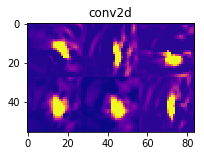

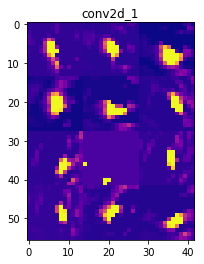

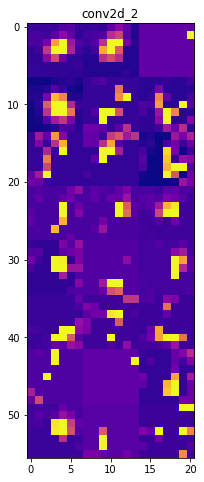

In [109]:
########Getting outputs for intermediate convolution layers by running prediction on test image ##########

# print(model.layers)
# layer_outputs = [layer.output for layer in model.layers]
# print(layer_outputs)

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
layer_outputs = [layer.output for layer in model.layers]
# print(layer_outputs)
# print(x_test[2])
image_path  = '/home/aditya/6thsem/deeplearning/ass1/images/0_1_7_1/0_1_7_1_34.jpg'
image_name = '0_1_7_1_34'
# import PIL
# import PIL.Image

# test_image = x_test[2]

# img = image.load_img(image_path, target_size=(28,28))
# img_tensor = Image.img_to_array(img)
# img_tensor = np.expand_dims(img_tensor, axis=0)
# img_tensor /= 255.
img = cv2.imread(image_path)
print(img.shape)

activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img.reshape(1, 28, 28, 3))
print(len(activations[5]))
layer_names = ['conv2d', 'conv2d_1', 'conv2d_2']
activ_list = [activations[0], activations[1], activations[2]]

images_per_row = 3

for layer_name, layer_activation in zip(layer_names, activ_list):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='plasma')
    plt.savefig("viz/"+image_name+' - '+layer_name+"_grid.png", bbox_inches='tight',pad_inches=0.1,edgecolor='r')

In [48]:
from tensorflow.keras import backend as K

inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
print(outputs)
functor = K.function([inp, K.learning_phase()], outputs )   # evaluation function

# Testing
test = np.random.random((28,28,3))[np.newaxis,...]
layer_outs = functor([test, 1.])
print(len(layer_outs))


print(x_train[0].shape)

[<tf.Tensor 'conv2d/Relu:0' shape=(?, 28, 28, 6) dtype=float32>, <tf.Tensor 'conv2d_1/Relu:0' shape=(?, 14, 14, 12) dtype=float32>, <tf.Tensor 'conv2d_2/Relu:0' shape=(?, 7, 7, 24) dtype=float32>, <tf.Tensor 'flatten/Reshape:0' shape=(?, 1176) dtype=float32>, <tf.Tensor 'dense/Relu:0' shape=(?, 200) dtype=float32>, <tf.Tensor 'dense_1/Softmax:0' shape=(?, 96) dtype=float32>]
6
(28, 28, 3)


In [25]:
y_pred = model.predict(x_test)

In [26]:
y_pred1 = []
  
y_pred1 =np.argmax(y_pred,axis=1) 
print(y_pred1)
# for i in y_pred1:
#     print(i)   
    
y_test = np.argmax(y_test,axis =1)
print(y_pred1)

[ 0  0  0 ... 95 95 95]
[ 0  0  0 ... 95 95 95]


In [27]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred1)
print(type(cf))


<class 'numpy.ndarray'>


In [28]:
import sys
from sklearn.metrics import f1_score
fscore = f1_score(y_test,y_pred1,average=None)
print(fscore)
np.set_printoptions(threshold=sys.maxsize)
# print(cf)
np.savetxt("line_cf2.csv", cf, delimiter=",")
np.savetxt("line_fscore2.csv", fscore, delimiter=",")

[0.9913259  0.88208617 0.99009901 0.78145695 0.98989899 0.75223881
 1.         1.         1.         0.99625468 1.         0.9706258
 1.         0.94160584 1.         0.94409938 1.         0.96410256
 0.99749373 1.         1.         0.91428571 0.99117276 0.79881657
 1.         0.96551724 0.99750623 0.96645963 0.99749373 0.97055058
 0.99875156 0.98503741 0.99874844 0.98873592 0.988622   0.96930946
 0.98511166 0.95798319 0.9937578  0.97193878 0.99750623 0.98881988
 0.995      0.96954933 0.99750623 0.96410256 1.         0.97236181
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.     



dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


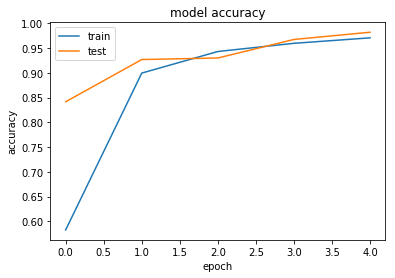

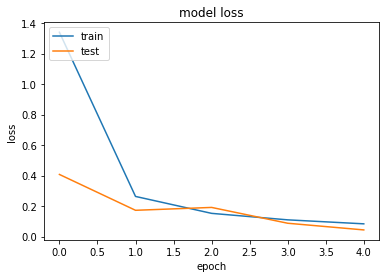

In [24]:
# history = model.fit(x=x_train,y=y_train, epochs=20, validation_split=0.33)
import matplotlib.pyplot as plt

# plot learning curves

print("\n")
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()